# Optical parameters for neutrons and x-rays

## Fresnel reflectivity and refraction in terms of refractive index

While the refractive index in reflectometry experiments is define the same way as in classical optics (see [Wikipedia](https://en.wikipedia.org/wiki/Snell's_law
)) the typical choice for the angle $\alpha$ is with respect to the surface of the sample, not the surface normal.

<img src="../figures/snell_refl.png" alt="angle sketch" width="20%"/>

Thus the Snell's Law becomes:

$$\frac{n_1}{n_0} = \frac{\cos{\alpha_0}}{\cos{\alpha_1}}$$

Here the $n_0$ and $n_1$ are the refractive indices of the material befor and after the interface, respectively.

Equivalently to the reciprocal space definition used in chapter [3](../3_reflectometry_slab_models/how_we_calculate_the_reflectivity_of_a_slab_model) one can calculate the Fresnel reflectivity accoring to these refractive indices:

$$r_{n, n+1}(\alpha) = \left| \frac{ n_0 \sin{\alpha_0} - n_1 \sin{\alpha_1} }{ n_0 \sin{\alpha_0} + n_1 \sin{\alpha_1} } \right|^2$$

## Refractive index and the scattering length density (SLD)

For neutrons and x-rays the refractive index is always close to 1. It is convenitently described by the radiation and material dependent scattering length density (SLD) according to:

$$ n^2 = 1 - \lambda^2 \frac{SLD_{n/x}}{\pi}$$

In the case of neutrons $\lambda^2 \frac{SLD}{\pi}$ is in the order of $10^{-6}$ while for x-rays it is around $10^{-5}$.
The SLD is a complex quantity where the imaginary part descirbes effects of absorption. For most elements the absorption for neutrons is negligible.

## SLD for neutrons

In thermal and cold neutrons for most elements the SLD does not depend on the beam energy/wavelength and can be directly calculated from the material density and the elemental coherent scattering length $b_n$ that are tabulated in (see [NIST table](https://www.ncnr.nist.gov/resources/n-lengths/)):

$$ SLD_n = \rho_{FU} \sum_{FU}{ b_{n_i} } $$

Where $\rho_{FU}$ is the number density of the formula unit and the scattering length, $b_{n_i}$, of all elements in the FU are summed.

Magnetic moments on individual atoms also contribute to the SLD with a sign that depends on the relative orientation to the neutron spin. This is outside of the scope of this chapter.

## Refractive index for x-rays

For x-rays the energy dependance of the SLD can not be ignored, especially close to absorption edges of the elements in the sample material.
The scattering Thopson potential leads to a SLD defined as:

$$ SLD_x(E) = \rho_{FU} \sum_{FU}{ \frac{r_e}{2} (f'(E) - i f''(E)) }$$ # please check this!!!

Here $r_e = \frac{1}{4\pi}\frac{e^2}{m_e c^2}$ is the classical electron radius (see [Wikipedia](https://en.wikipedia.org/wiki/Classical_electron_radius)) and f' and f'' are the energy dependent x-ray scattering factors.


## Implications of different contrasts for neutrons and x-rays

We will calculate an example to illustrate the difference the SLD calculation makes to the reflectivity experiment.
We will use the simple example of a layer of something on water:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
alpha = np.linspace(0, 6.0, 600) * np.pi/180.

rho_FU_water = 0.03342360 # 1/angstrom³
rho_FU_layer = 0.00461223 # 1/angstrom³
r_e = 2.817940326e-5 # angstrom

SLDn_H2O = rho_FU_water *   ( -3.75e-5*2 + 5.83e-5 )
SLDn_D2O = rho_FU_water *   (  6.67e-5*2 + 5.83e-5)
SLDn_layer = rho_FU_layer * ( -3.75e-5*14 + 6.646e-5*6 ) # C6H14
SLDx_water = rho_FU_water * r_e*((1.00001-0.00000j)*2 + 8.05139-0.03156j)
SLDx_layer = rho_FU_layer * r_e*((1.00001-0.00000j)*14 + (6.01934-0.00890j)*6 ) # C6H14

print(f'The neutron values are: {SLDn_H2O=:.4e}, {SLDn_D2O=:.4e}, {SLDn_layer=:.4e}')
print(f'The x-ray values are: {SLDx_water=:.4e}, {SLDx_layer=:.4e}')

The neutron values are: SLDn_H2O=-5.5817e-07, SLDn_D2O=6.4073e-06, SLDn_layer=-5.8225e-07
The x-ray values are: SLDx_water=9.4670e-06-2.9725e-08j, SLDx_layer=6.5136e-06-6.9404e-09j


We use the RefNX package to calculate the reflecitity curves:

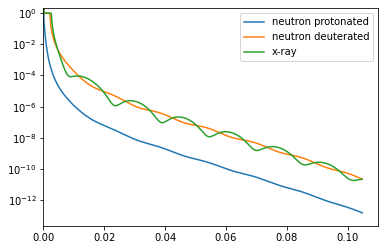

In [3]:
from refnx.reflect import SLD, ReflectModel, Structure

q = 4*np.pi/1.54*np.sin(alpha)

structure = Structure()
air = SLD(0.0)
structure |= air(50.0, 3.0)
mn_layer = SLD(SLDn_layer * 1e6)
structure |= mn_layer(50.0, 3.0)
mn_H2O = SLD(SLDn_H2O * 1e6)
structure |= mn_H2O(100.0, 3.0)
model = ReflectModel(structure, bkg=0.0)

plt.semilogy(alpha, model(q), label='neutron protonated')

structure = Structure()
air = SLD(0.0)
structure |= air(50.0, 3.0)
mn_layer = SLD(SLDn_layer * 1e6)
structure |= mn_layer(50.0, 3.0)
mn_D2O = SLD(SLDn_D2O * 1e6)
structure |= mn_D2O(100.0, 3.0)
model = ReflectModel(structure, bkg=0.0)

plt.semilogy(alpha, model(q), label='neutron deuterated')

structure = Structure()
air = SLD(0.0)
structure |= air(50.0, 3.0)
mx_layer = SLD(SLDx_layer * 1e6)
structure |= mx_layer(50.0, 3.0)
mx_H2O = SLD(SLDx_water * 1e6)
structure |= mx_H2O(100.0, 3.0)
model = ReflectModel(structure, bkg=0.0)

plt.semilogy(alpha, model(q), label='x-ray')
plt.legend()
plt.xlim(0, None)
plt.ylim(None, 2);

In [4]:
# we should add a second example with more absorption and heavier elements

## Retreiving optical parameters from ORSO database

The ORSO SLD database contains density and scattering information to calculate the optical parameters for various materials.
The *orsopy* package can be used to retreive those programatically.

In [5]:
from orsopy.slddb import api

A search query will return a list of dictionaries with the information from the matching database entries. The search fields are defined as keyword arguments:

In [6]:
result=api.search(formula="Fe")
result

[{'ID': 26,
  'validated': '2021-11-18 22:35:52',
  'validated_by': 'Artur Glavic <artur.glavic@psi.ch>',
  'name': 'Iron',
  'description': '',
  'formula': 'Fe',
  'HR_formula': None,
  'density': 7.874,
  'FU_volume': None,
  'SLD_n': None,
  'SLD_x': None,
  'E_x': None,
  'mu': 0.0,
  'physical_state': 'solid',
  'tags': [],
  'ref_website': 'https://github.com/pkienzle/periodictable',
  'reference': 'Python module periodictable, \ndata source: ILL Neutron Data Booklet',
  'doi': None,
  'purity': None,
  'CAS_No': None,
  'crystal_data': None,
  'temperature': None,
  'magnetic_field': None,
  'data_origin': 'textbook',
  'comments': None},
 {'ID': 106,
  'validated': None,
  'validated_by': None,
  'name': 'Fe ',
  'description': None,
  'formula': 'Fe',
  'HR_formula': None,
  'density': 7.874,
  'FU_volume': None,
  'SLD_n': None,
  'SLD_x': None,
  'E_x': None,
  'mu': 2.2,
  'physical_state': 'solid',
  'tags': ['magnetic'],
  'ref_website': None,
  'reference': 'Christy Kin

In [7]:
m=api.material(ID=26)
m

Material([('Fe', 1.0)], fu_volume=11.77708968431255)

In [8]:
print(f'Neutron SLD is: {m.rho_n}')
print(f'X-Ray SLD for Cu k-alpha is: {m.rho_of_E(8.0478)}')

Neutron SLD is: (8.024053695190667e-06-6.044804995824017e-10j)
X-Ray SLD for Cu k-alpha is: (5.983011590323767e-05-7.533605403282578e-06j)


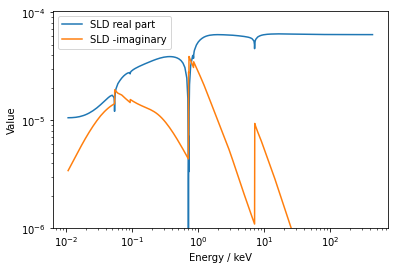

In [9]:
E, rho = m.rho_vs_E()
plt.loglog(E, rho.real, label='SLD real part')
plt.loglog(E, -rho.imag, label='SLD -imaginary')
plt.ylabel('Value')
plt.xlabel("Energy / keV")
plt.ylim(1e-6, None)
plt.legend();